# Exercício 8

### Levy Marques Nunes
ler o item 2.4 e fazer gráficos para ilustrar suas tabelas no trabalho tons

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df_raw = pd.read_excel(
    "ANÁLISE DA PERCEPÇÃO ESTÉTICA DE ESPÉCIMES ANATÔMICOS PLASTINADOS COLORIDOS E NÃO COLORIDOS - COMPLENTO (1) - Respostas ao formulário 1.xlsx"
)


In [11]:
def tweak_plastinacao(df):
    df.columns = [
        "data_hora",
        "data",
        "n_tons",
        "identificacao",
        "conhecia_plastificacao",
        "contato_especime",
        "caso_sim",
        "prefere_colorido",
        "colorido_facilita_identificacao",
        "precebeu_diferenca_tonalidade_colorido",
        "ratos_wistar_tom",
        "comente_ratos",
        "animais_silvestres_tom",
        "comente_animais_silvestres",
        "percepcao_nao_coloridos",
        "percepcao_coloridos",
        "interessante_plastinados",
        "anterior_seja_positiva",
        "comentarios",
    ]

    # juntar categorias em publico geral e publico anatomia

    df["publico"] = (
        df["identificacao"]
        .isin(["Aluno de Anatomia", "Docente de Anatomia", "Técnico de Anatomia"])
        .map({False: "Publico Geral", True: "Publico Anatomia"})
    )

    return df


In [12]:
df = tweak_plastinacao(df_raw)

In [33]:
def plot_vertical_bar_normal(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    data.plot(kind="bar", stacked=False, ax=ax)

    # Add text labels above each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), ".2%"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()


def plot_stacked_bar_normal(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    data.plot(kind="bar", stacked=True, ax=ax)

    # add text inside each bar, 2 decimal places
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(
            f"{height:.2%}",
            (x + 0.5 * width, y + 0.5 * height),
            ha="center",
            va="center",
        )

    # change legend title

    # rotate xaxis 45

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()


def plot_horizontal_bar(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    data.plot(kind="barh", stacked=False, ax=ax)

    # Add text labels on the side of each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), ".2%"),
            (p.get_width(), p.get_y() + p.get_height() / 2.0),
            ha="center",
            va="center",
            xytext=(5, 0),
            textcoords="offset points",
        )

    plt.show()


def plot_horizontal_stacked_bar(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    data.plot(kind="barh", stacked=True, ax=ax)

    # Add text labels on the side of each bar

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(
            f"{width:.2%}",
            (x + 0.5 * width, y + 0.5 * height),
            ha="center",
            va="center",
        )

    ax.legend(title="Público", loc=7, fontsize="small", fancybox=True)

    # legend ouside graph
 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

    plt.show()


def junta_bar(data):
    data = data.stack(0).reset_index(name="percentage")
    # join the first two columns into one
    data["publico_x"] = data.iloc[:, 0] + " " + data.iloc[:, 1]

    # do a bar plot with publico_rato and percentage

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        x="percentage",
        y="publico_x",
        data=data.sort_values("percentage", ascending=False),
        ax=ax,
    )
    plt.show()


def pie_chart(data):
    data = data.stack(0).reset_index(name="percentage")

    # join the first two columns into one
    data["publico_x"] = data.iloc[:, 0] + " " + data.iloc[:, 1]

    # pie chart
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.pie(
        data["percentage"],
        labels=data["publico_x"],
        autopct="%1.1f%%",
        startangle=90,
    )

    plt.show()

In [34]:
# plot data

data_3_ratos = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
)


data_5_ratos = (
    df.query("n_tons == 5")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
)

data_3_animais = (
    df.query("n_tons == 3")
    .groupby(["publico"])["animais_silvestres_tom"]
    .value_counts(normalize=True)
    .unstack()
)

data_5_animais = (
    df.query("n_tons == 5")
    .groupby(["publico"])["animais_silvestres_tom"]
    .value_counts(normalize=True)
    .unstack()
)


## Ratos - 3 tons

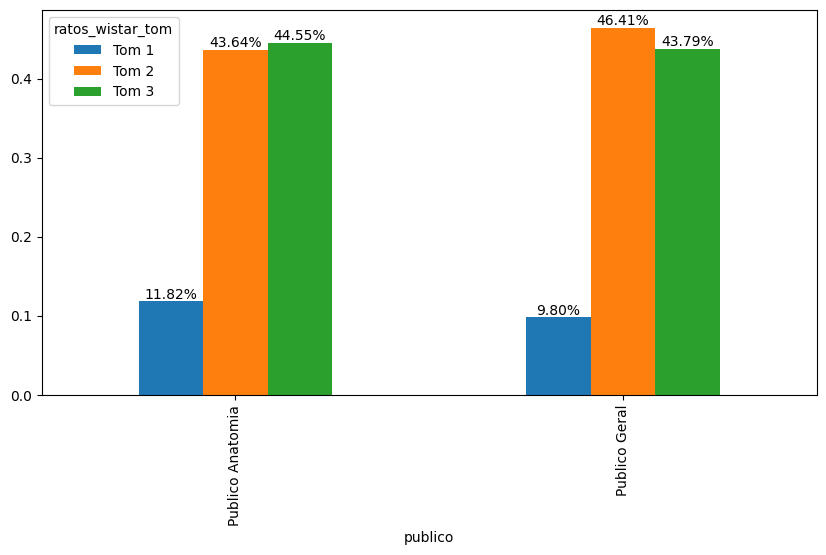

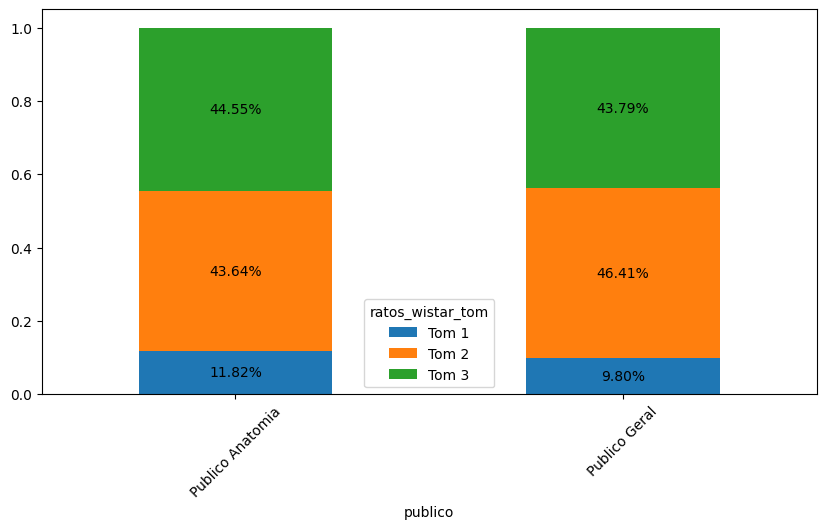

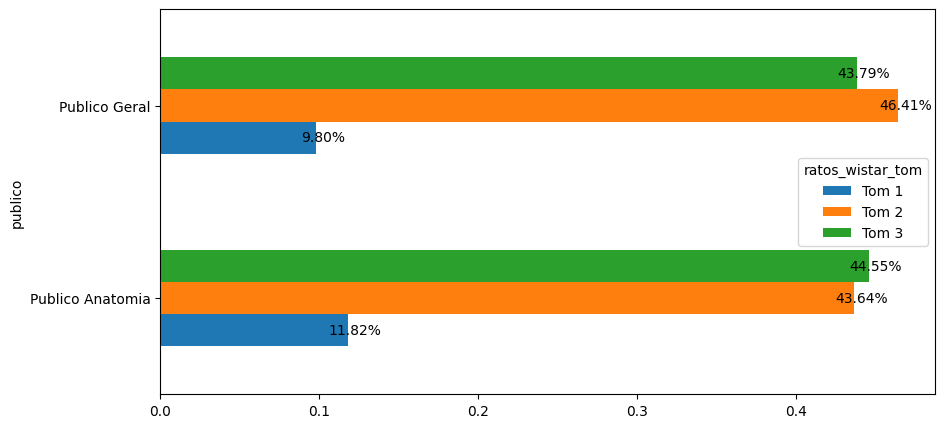

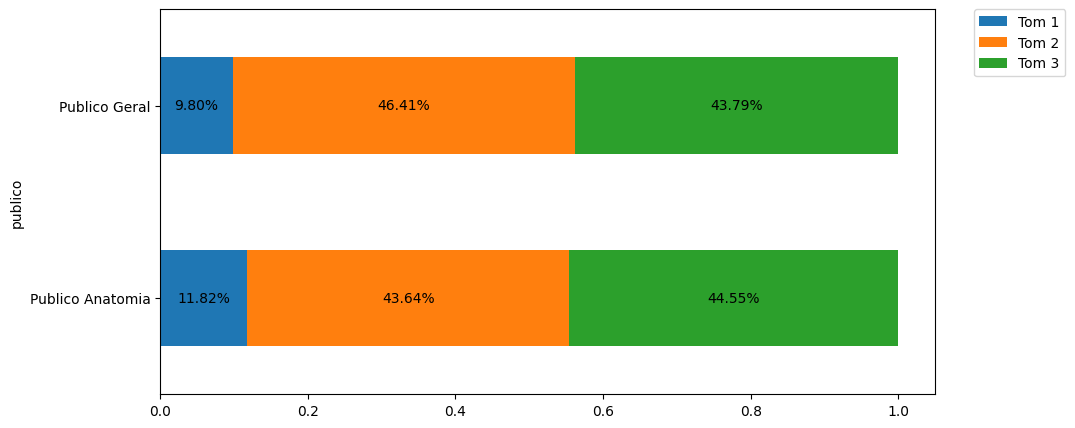

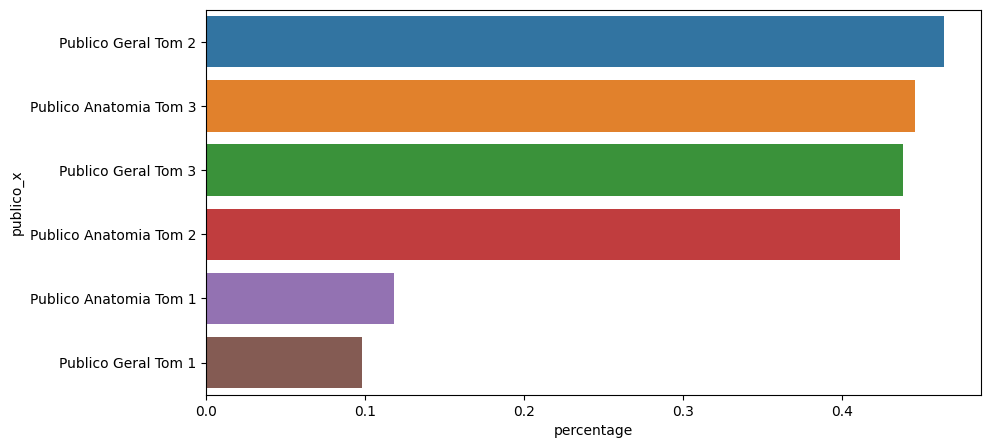

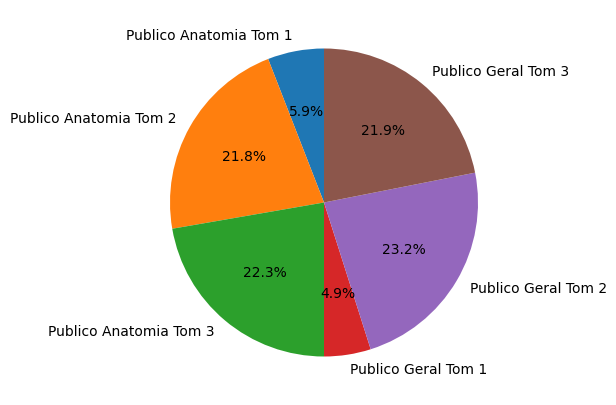

In [35]:
d = data_3_ratos
plot_vertical_bar_normal(d)
plot_stacked_bar_normal(d)
plot_horizontal_bar(d)
plot_horizontal_stacked_bar(d)
junta_bar(d)
pie_chart(d)


## Ratos - 5 tons

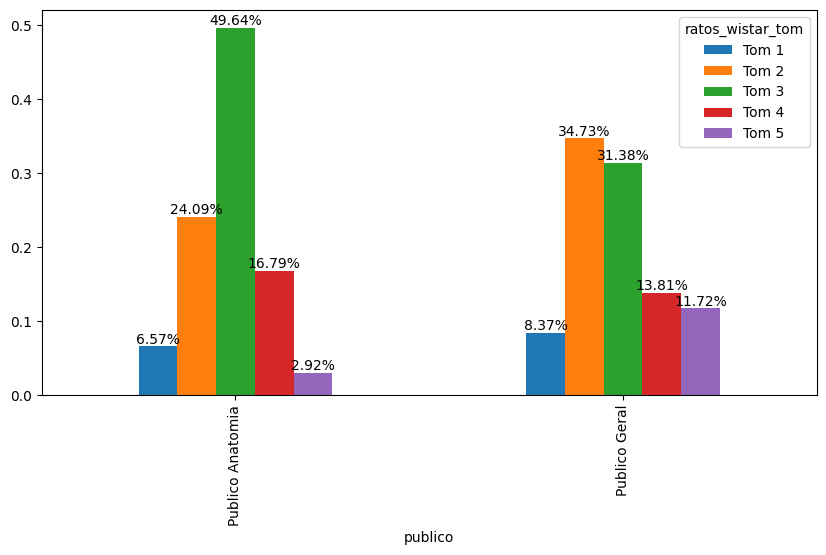

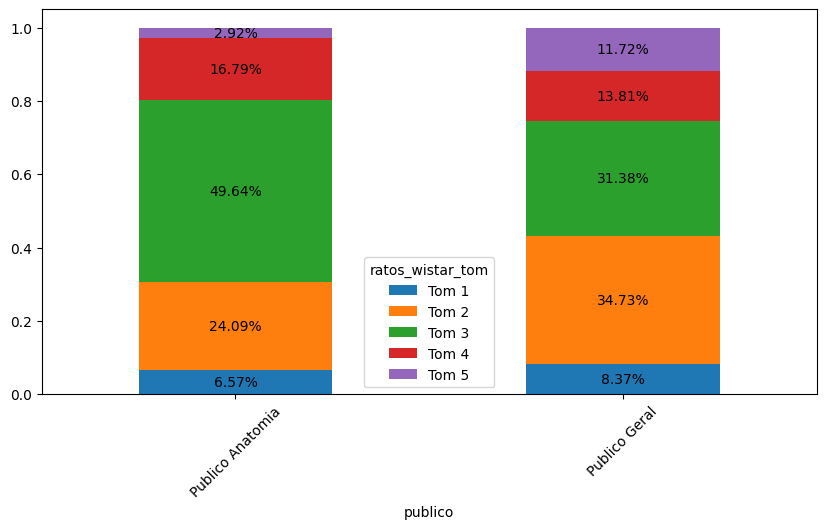

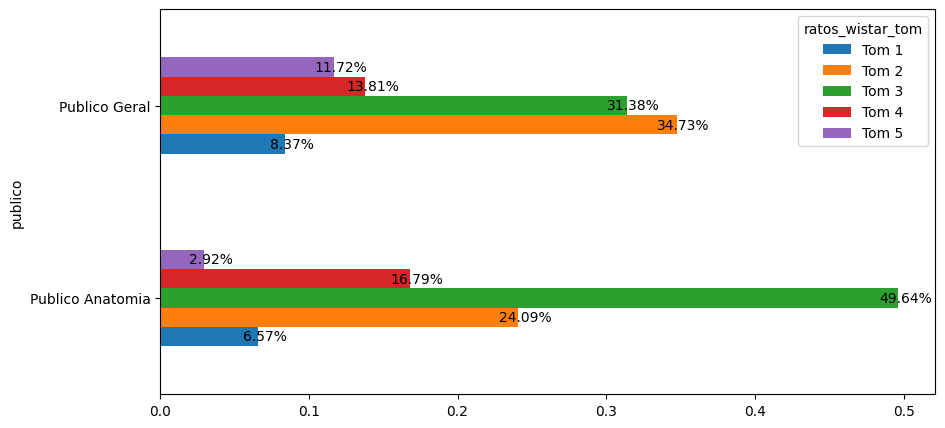

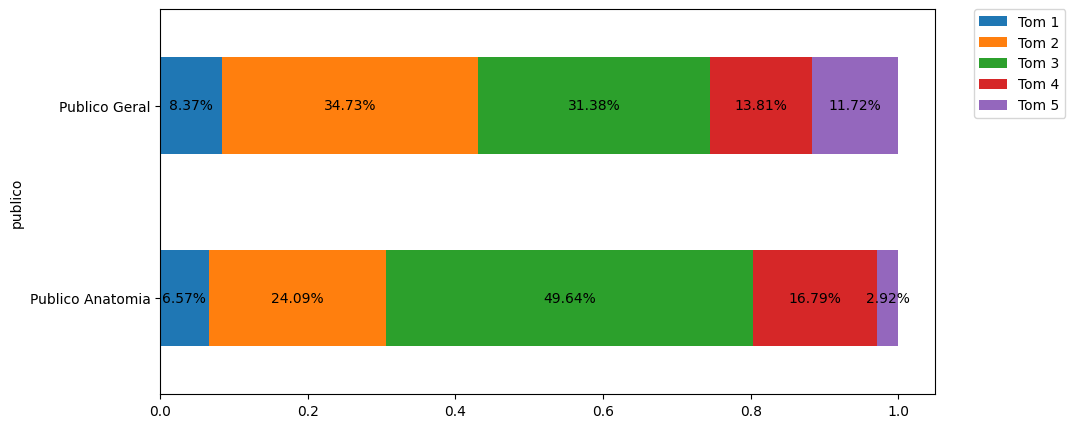

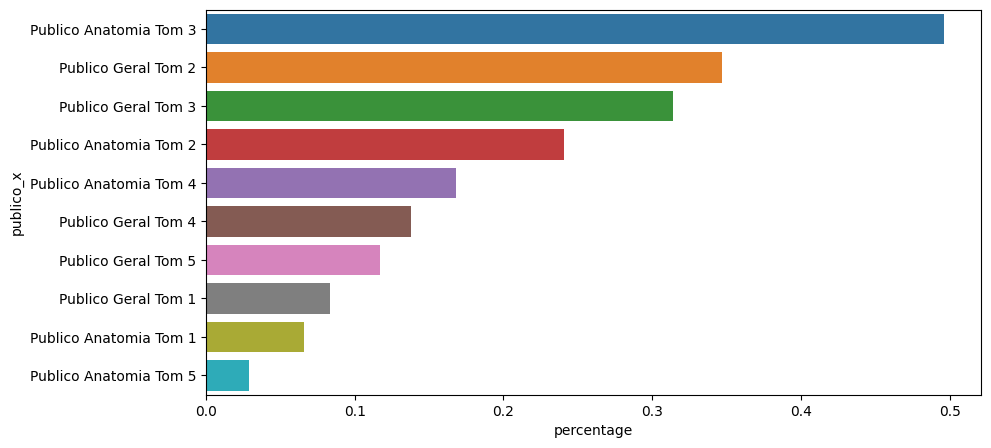

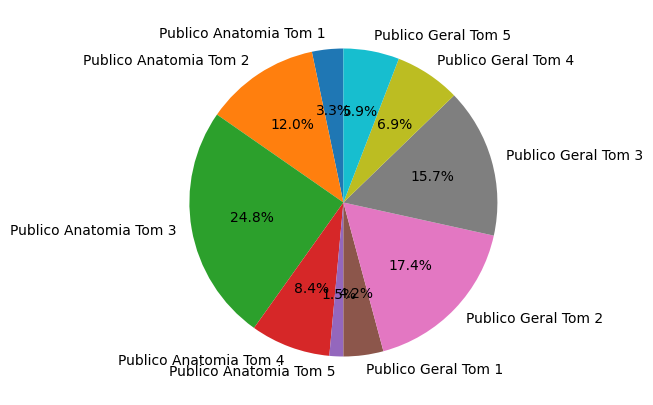

In [36]:
d = data_5_ratos
plot_vertical_bar_normal(d)
plot_stacked_bar_normal(d)
plot_horizontal_bar(d)
plot_horizontal_stacked_bar(d)
junta_bar(d)
pie_chart(d)


## Animais Silvestres - 3 tons

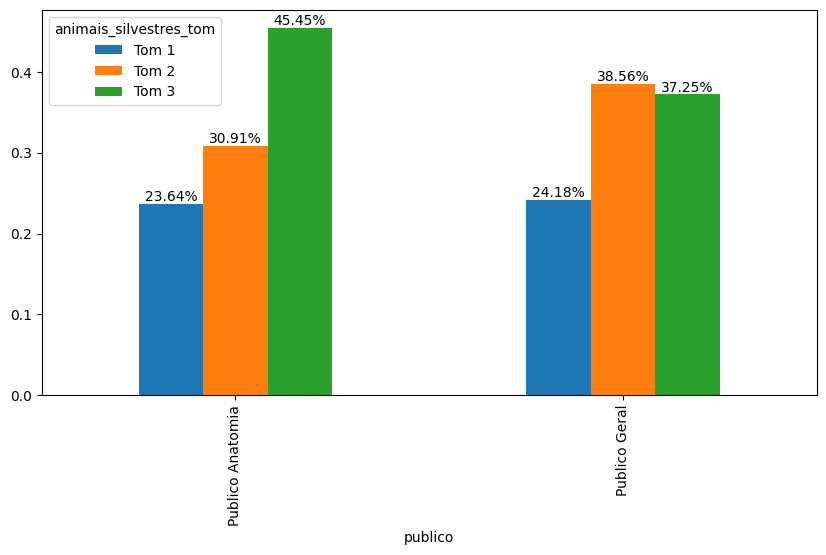

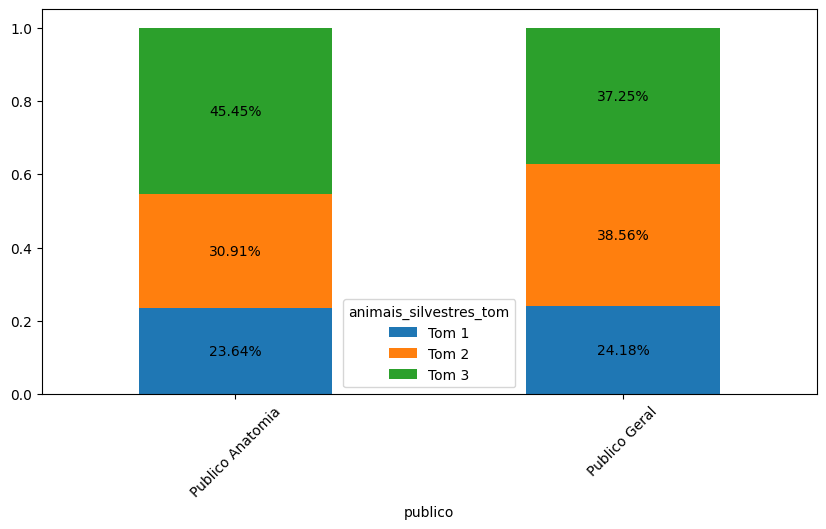

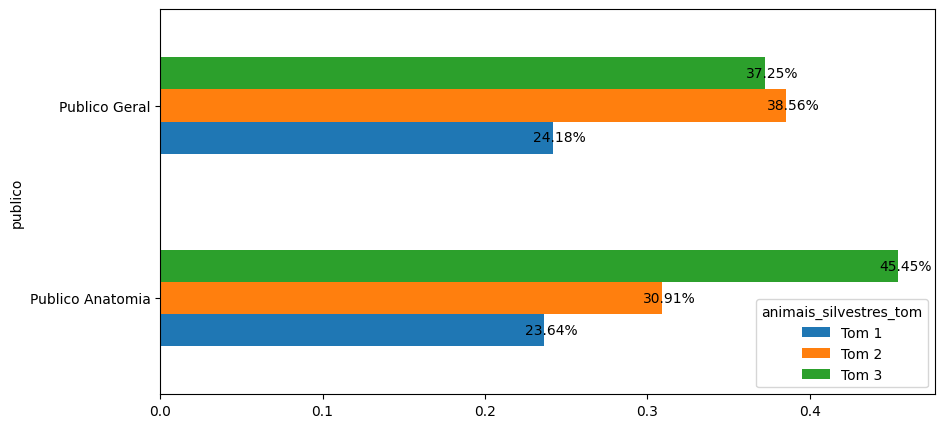

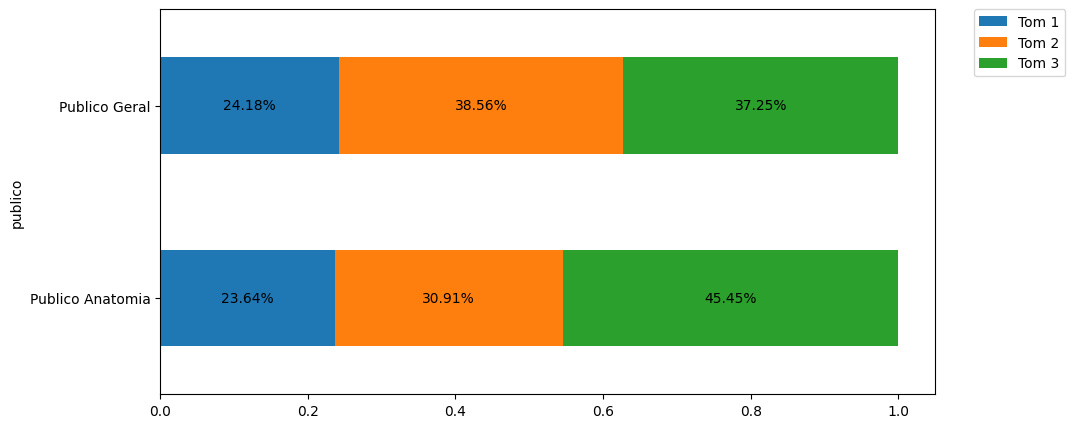

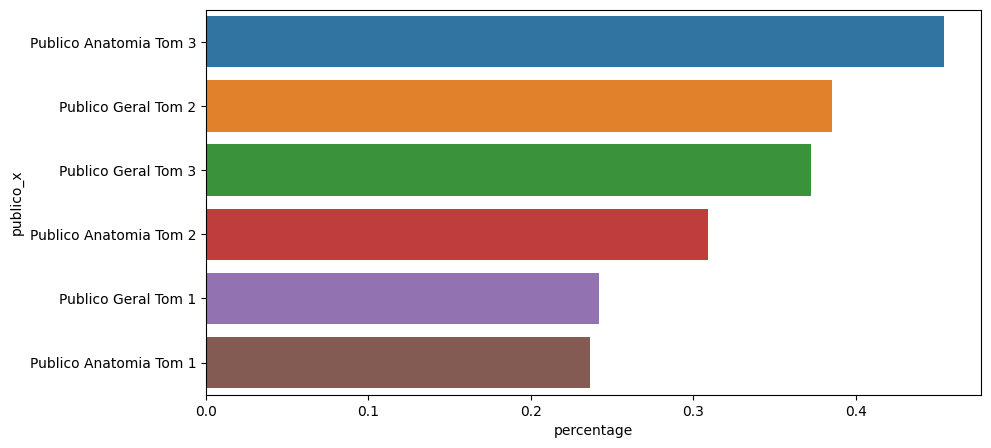

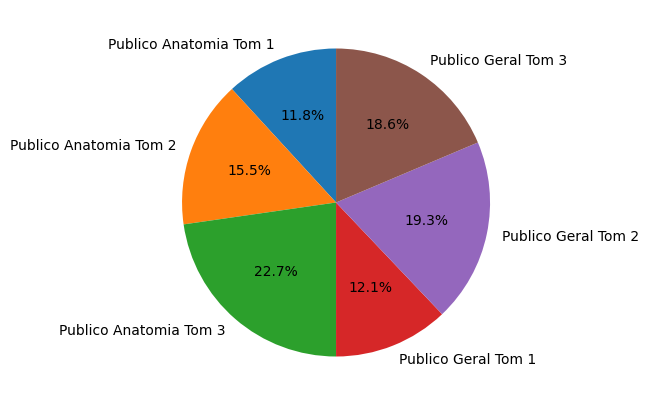

In [37]:
d = data_3_animais
plot_vertical_bar_normal(d)
plot_stacked_bar_normal(d)
plot_horizontal_bar(d)
plot_horizontal_stacked_bar(d)
junta_bar(d)
pie_chart(d)


## Animais Silvestres - 5 tons

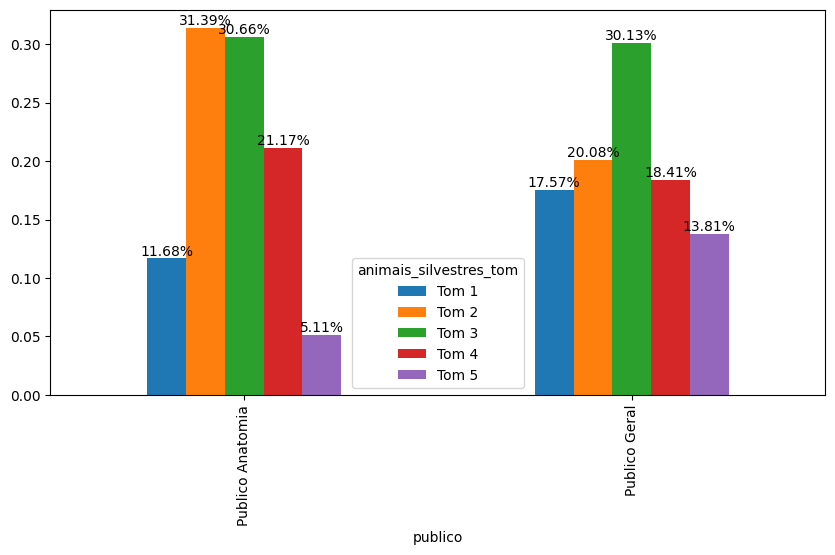

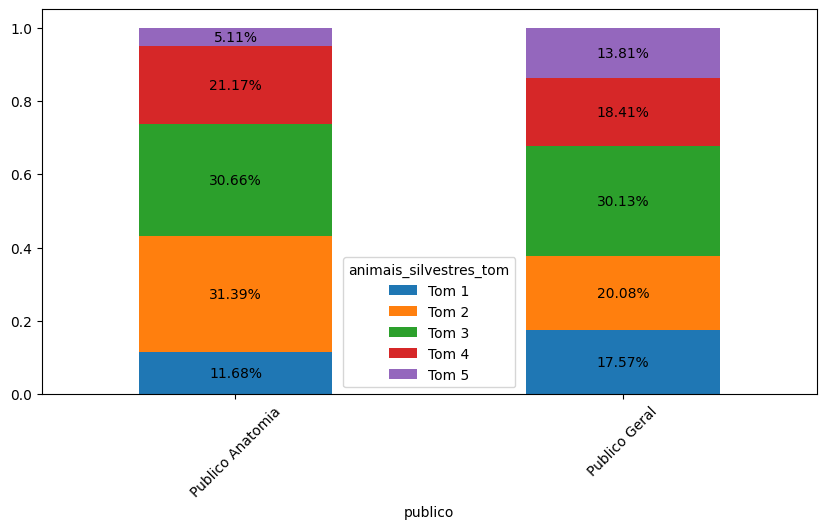

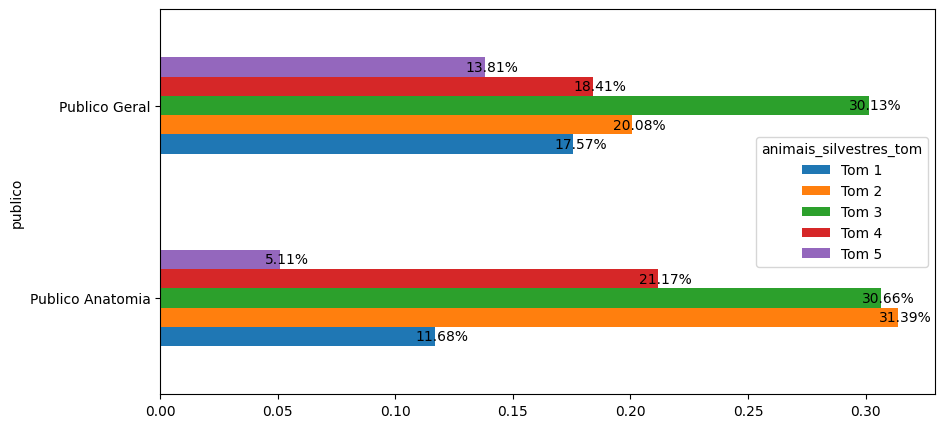

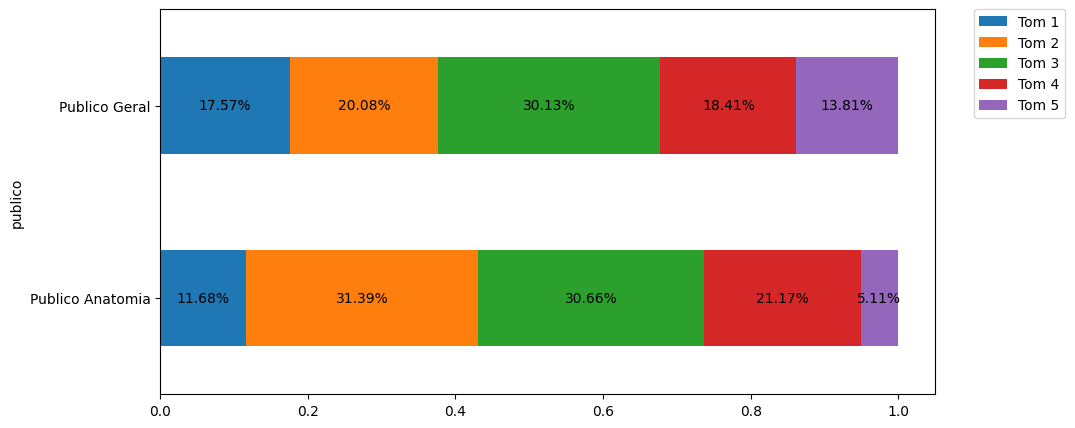

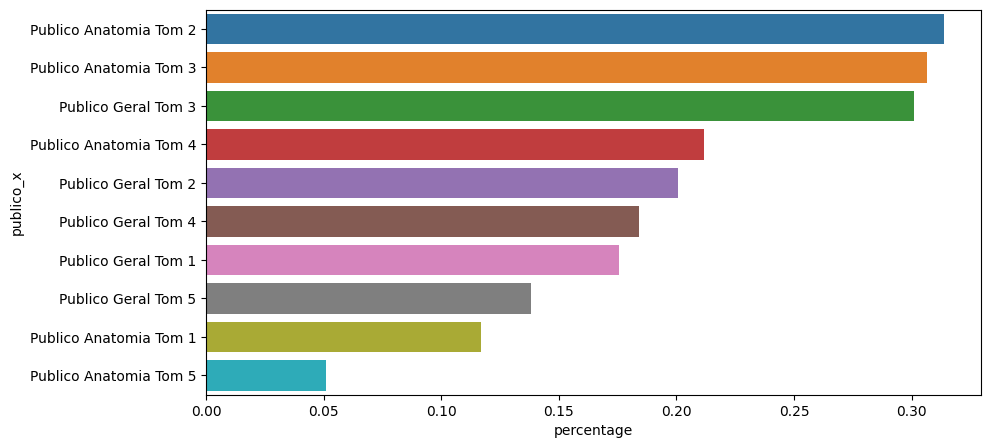

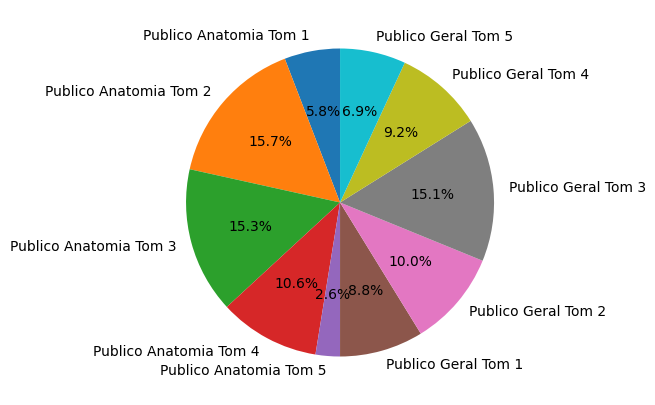

In [38]:
d = data_5_animais

plot_vertical_bar_normal(d)
plot_stacked_bar_normal(d)
plot_horizontal_bar(d)
plot_horizontal_stacked_bar(d)
junta_bar(d)
pie_chart(d)
